In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['C0', 'C1', 'C2'])

%matplotlib inline

In [14]:
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['font.size'] = 16

# Get some example data

We will use one of the most common data sets to get to know machine learning: the iris flower dataset.

We want to classify three kinds of different iris flowers using measuremnts of there leaves.

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()

We want to do supervised learning, so we need a dataset with known truth values to train our model. Which can then do predictions on unkown data.

Our target variable is the kind of iris, which we will simply encode as integer:

In [17]:
for i, label in enumerate(iris.target_names):
    print(i, ':', label)

0 : setosa
1 : versicolor
2 : virginica


Let's look into some of the features we have:

In [18]:
print(*iris.feature_names, sep='\n')

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


Let's look into some plots

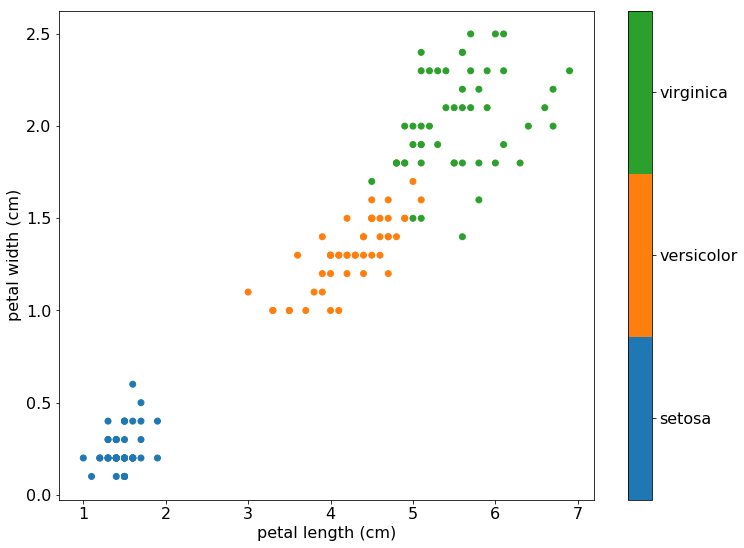

In [25]:
x = 2
y = 3

plt.scatter(
    iris.data[:, x],
    iris.data[:, y],
    c=iris.target,
    cmap=cmap,
    vmin=-0.5,
    vmax=len(iris.target_names) - 0.5,
)
bar = plt.colorbar()
bar.set_ticks(np.arange(len(iris.target_names)))
bar.set_ticklabels(iris.target_names)
plt.xlabel(iris.feature_names[x])
plt.ylabel(iris.feature_names[y])

# Let's try to do a classification

To get an estimation of our model performance, we split our data into a training set for the model creation
and a test set for the evaluation

In [42]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# Use 80 % of the events for training, 30 % for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now we can train a model. We will use a RandomForestClassifier, because for many application it's
a robust and "works-out-of-the-box" algorithm.

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

To train the model, we call model.fit with the training data and true labels

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now we can apply it to the test data

In [45]:
prediction = model.predict(X_test)

# How good are we?

We will use the accuracy as performance criterium, this is the percentage of corretly classified events

In [46]:
from sklearn.metrics import accuracy_score

In [49]:
print('{:.4f}'.format(accuracy_score(y_test, prediction)))

0.9333


# Save the model for later use

In [50]:
from sklearn.externals import joblib

In [51]:
joblib.dump(model, 'model.pkl')

['model.pkl']

# Load it back

In [52]:
model = joblib.load('model.pkl')